Viewing multi-band satellite imagery such as the data you obtained with Sentinel-2 bands (which includes bands beyond the visible spectrum) can be more complex than viewing simple RGB images. 

Since the dataset now includes Near-Infrared (NIR) and Short-Wave Infrared (SWIR) bands, which are not visible to the human eye, we will need to use specific packages to manipulate the bands to view the image.

# Step 1: Reading and Visualizing the Data

Here's a simple way to read a multi-band TIFF file and visualize specific bands using **rasterio** and **matplotlib**. This example will demonstrate how to display a *False Color Composite*, which is commonly used to view vegetation (using NIR, Red, and Green bands).

In [121]:
import rasterio
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os

In [79]:
# Custom function to plot satellite image
# Copied from this Github page: https://github.com/sentinel-hub/sentinelhub-py/blob/master/examples/utils.py

def plot_image(
    image: np.ndarray, factor: float = 1.0, clip_range: tuple[float, float] | None = None, **kwargs: Any
) -> None:
    """Utility function for plotting RGB images."""
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [81]:
# Path to TIFF file
all_bands_tiff_path = 'Data\84adf81eb4ae349dc1f28833fabdf54b/response.tiff'

## Band 12 (SWIR)

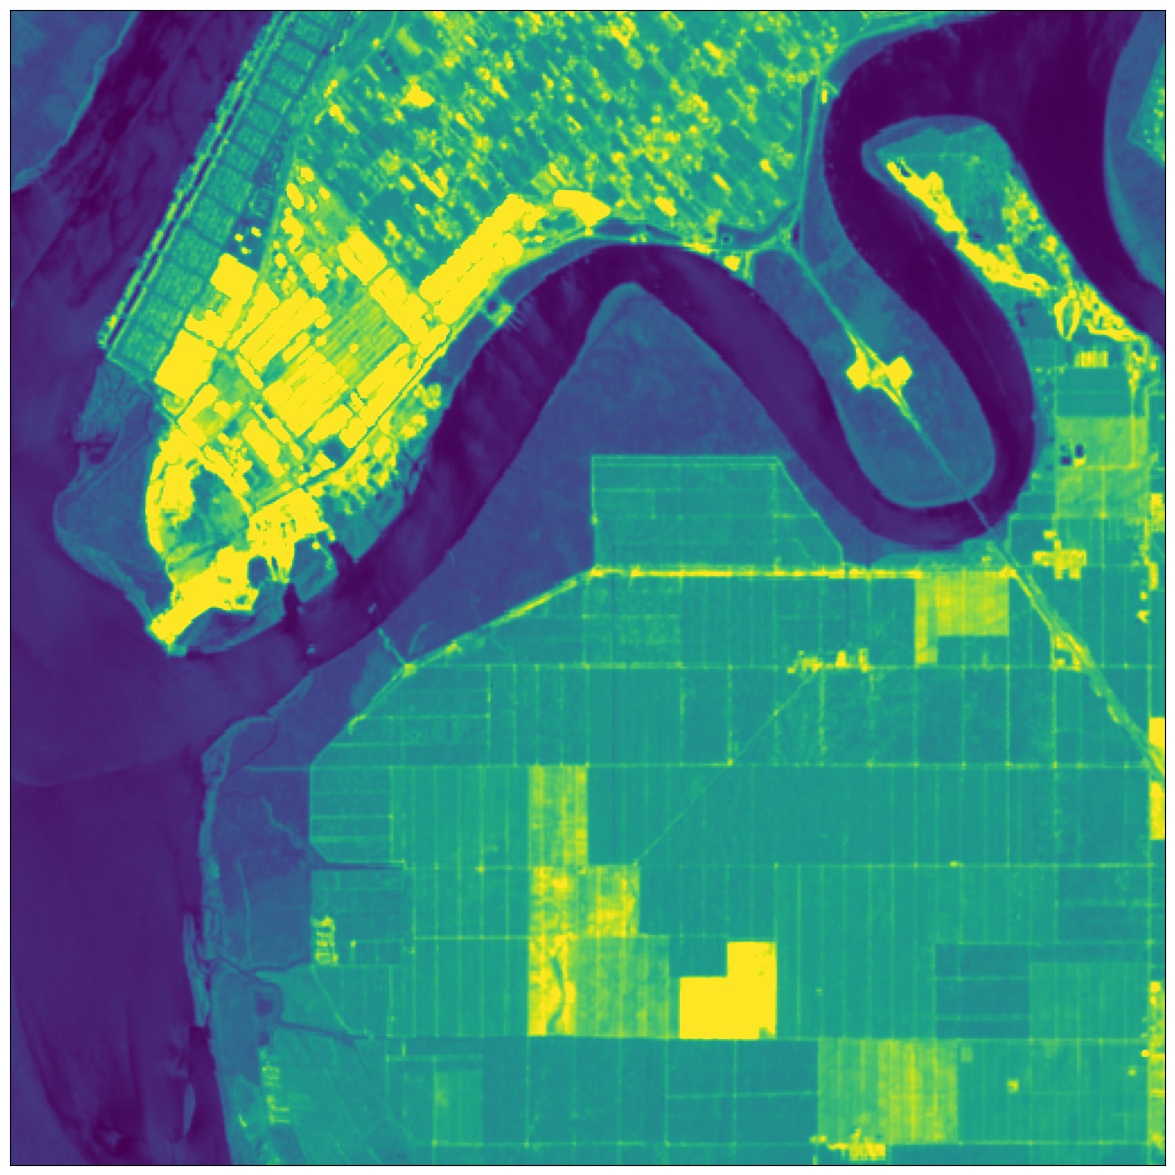

In [127]:
# Plot band 12
with rasterio.open(all_bands_tiff_path) as src:
    # Reading specific bands (for example, bands 4, 3, and 2 for RGB)
    swir_band = src.read(12)
    
    img =  plot_image(swir_band, factor=3.5 / 1e4, vmax=1)
    

## False colour image (B03, B04,B08)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


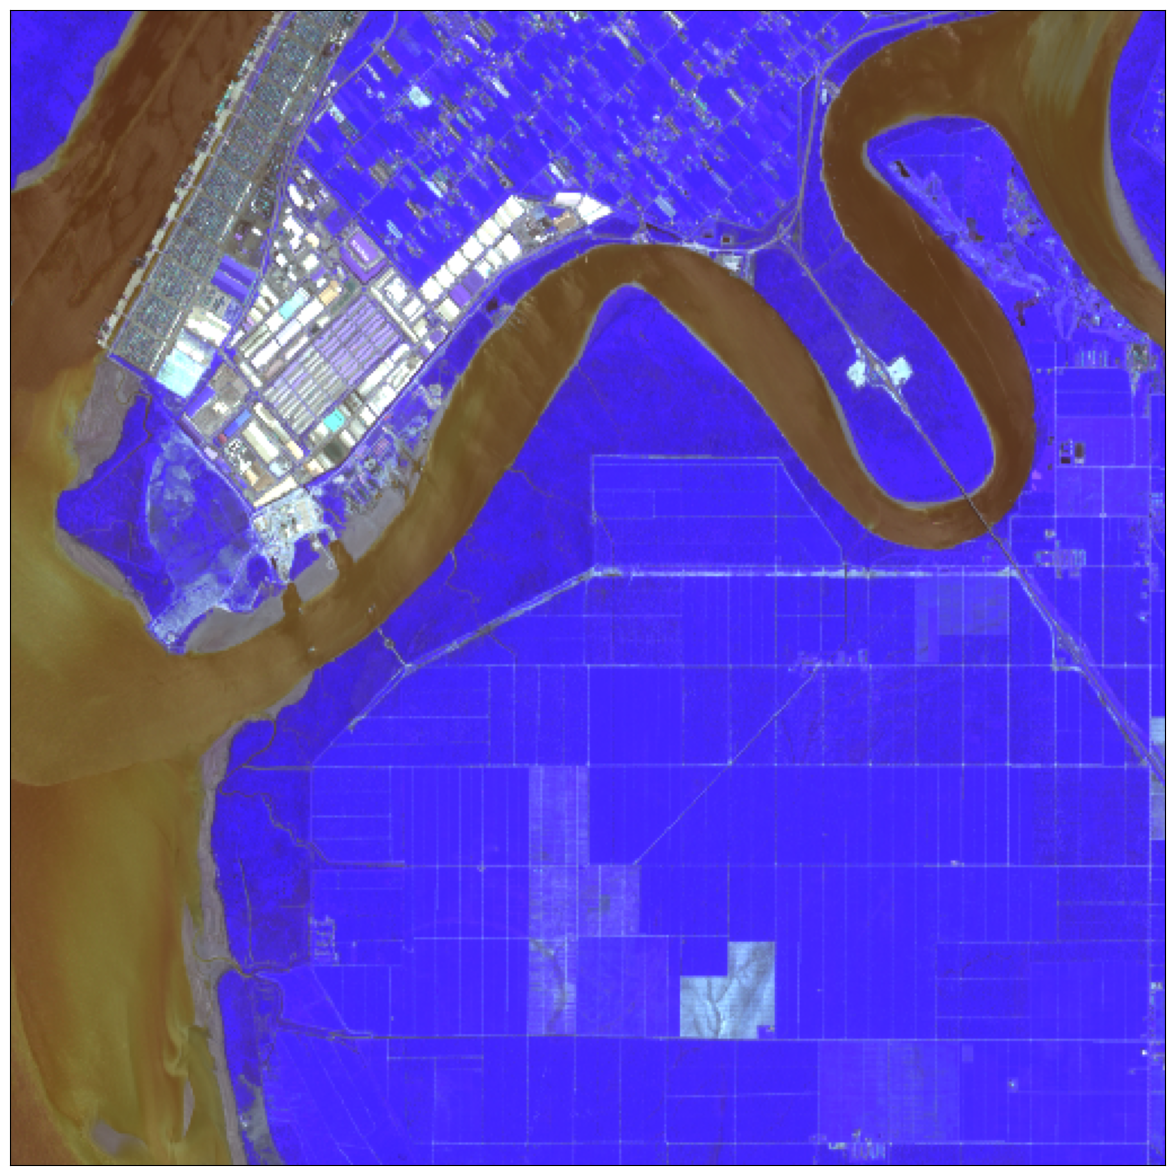

In [98]:
with rasterio.open(all_bands_tiff_path) as src:
    green_band = src.read(3)
    red_band = src.read(4)
    nir_band = src.read(8)
      
    stacked_bands = np.dstack((green_band, red_band, nir_band))
                              
    plot_image(stacked_bands, factor=3.5 / 1e4, vmax=1)


## RGB (B04, B03, B02) image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


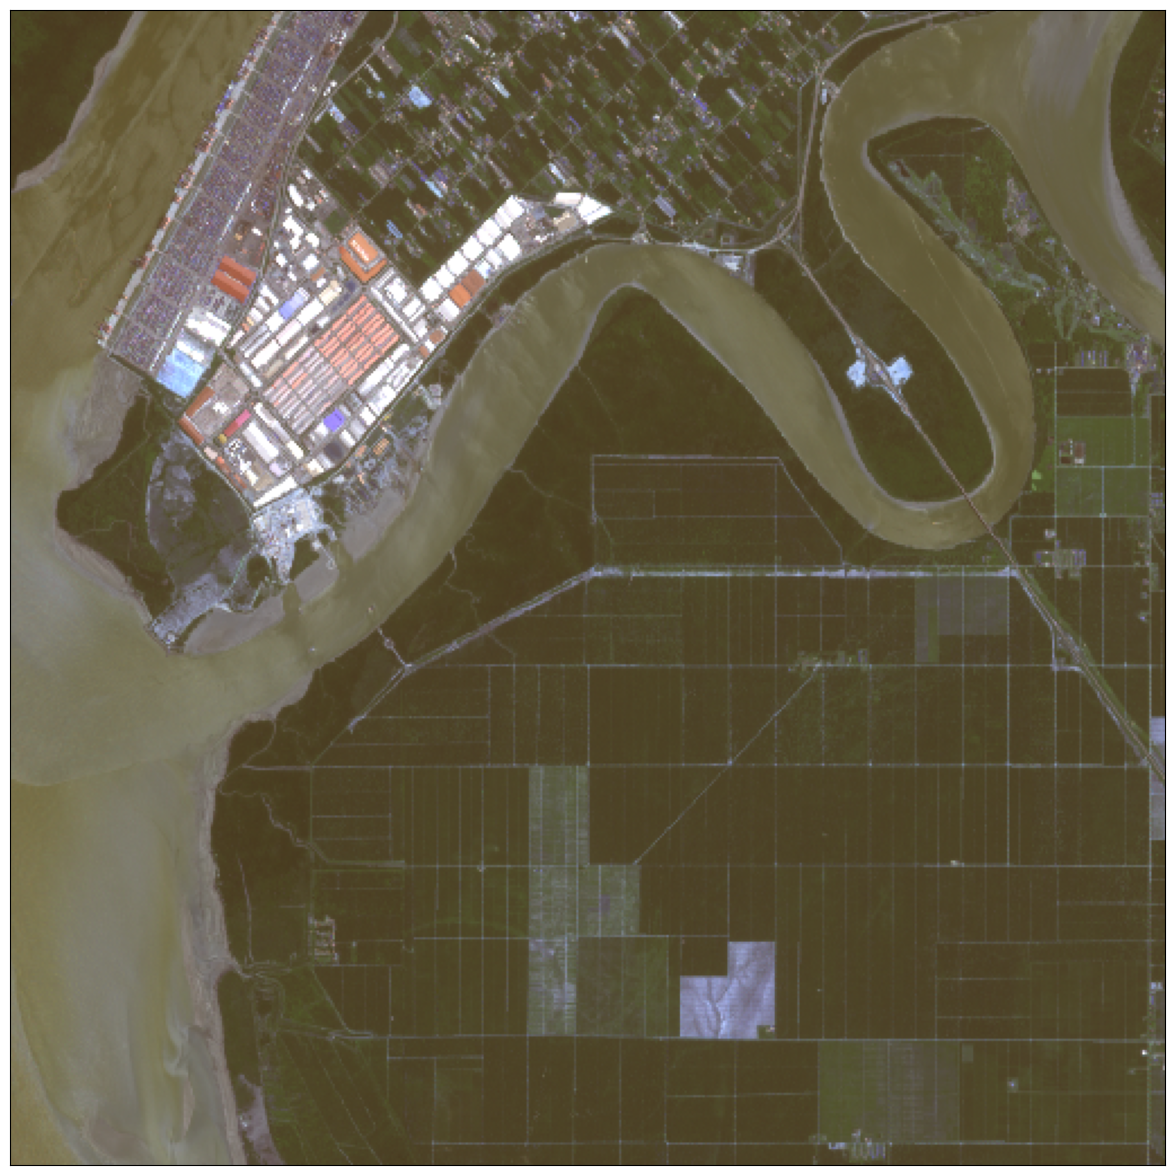

In [103]:
with rasterio.open(all_bands_tiff_path) as src:
    blue_band = src.read(2)
    green_band = src.read(3)
    red_band = src.read(4)
      
    stacked_bands = np.dstack((blue_band, green_band, red_band))
                              
    plot_image(stacked_bands, factor=3.5 / 1e4, vmax=1)